### Multicollinearity & VIFs

Using the notebook here, answer the quiz questioons below regarding multicollinearity.

To get started let's read in the necessary libraries and the data that will be used.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.`Use [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) to look at pairwise relationships for all of the quantitative, explanatory variables in the dataset by running the cell below.  You might also investigate how to add color (**hue**) for the house style or neighborhood.  Use the plot to answer the first quiz questions below.

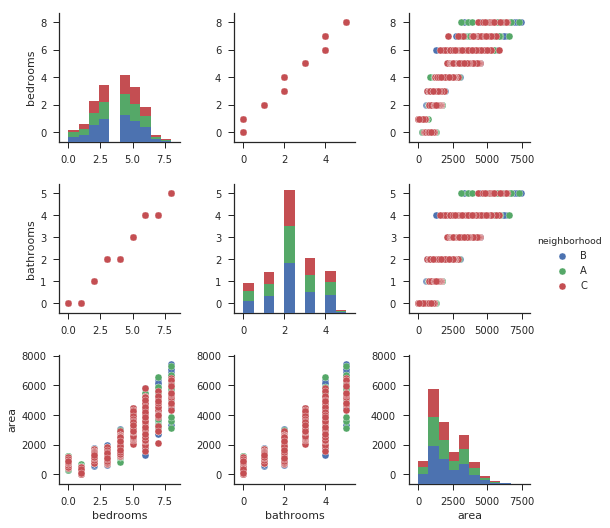

In [9]:
sns.set(style="ticks")
sns.pairplot(df[['neighborhood', 'bedrooms', 'bathrooms', 'area']], hue='neighborhood');

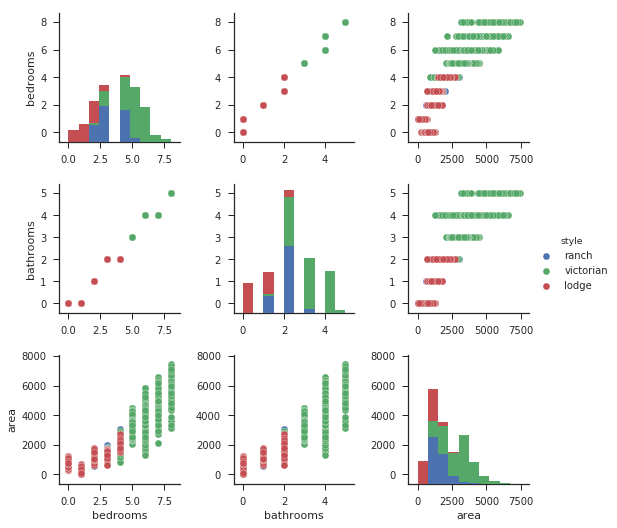

In [11]:
sns.pairplot(df[['style', 'bedrooms', 'bathrooms', 'area']], hue='style');

`2.` Earlier, you fit linear models between each individual predictor variable and price, as well as using all of the variables and the price in a multiple linear regression model. Each of the individual models showed a positive relationship - that is, when bathrooms, bedrooms, or area increase, we predict the price of a home to increase. 

Fit a linear model to predict a home **price** using **bedrooms**, **bathrooms**, and **area**. Use the summary to answer the second quiz question below. **Don't forget an intercept.**

In [12]:
df['intercept'] = 1
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept
0,1112,B,1188,3,2,ranch,598291,1
1,491,B,3512,5,3,victorian,1744259,1
2,5952,B,1134,3,2,ranch,571669,1
3,3525,A,1940,4,2,ranch,493675,1
4,5108,B,2208,6,4,victorian,1101539,1


In [13]:
lm = sm.OLS(df['price'], df[['intercept', 'area', 'bedrooms', 'bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        12:59:50   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` Calculate the VIFs for each variable in your model.  Use quiz 3 below to provide insights about the results of your VIFs.  [Here](https://etav.github.io/python/vif_factor_python.html) is the helpful post again, in case you need it!

In [19]:
# Run a multiple regression
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type='dataframe')

In [22]:
y.head(5)

,price
0,598291.0
1,1744259.0
2,571669.0
3,493675.0
4,1101539.0


In [23]:
X.head(5)

,Intercept,area,bedrooms,bathrooms
0,1.0,1188.0,3.0,2.0
1,1.0,3512.0,5.0,3.0
2,1.0,1134.0,3.0,2.0
3,1.0,1940.0,4.0,2.0
4,1.0,2208.0,6.0,4.0


In [25]:
# Calculate VIF Factors
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [26]:
# Inspect VIF Factors
vif.round(1)

,VIF Factor,features
0,7.3,Intercept
1,5.5,area
2,20.9,bedrooms
3,19.0,bathrooms


`4.` Remove bathrooms from your above model.  Refit the multiple linear regression model and re-compute the VIFs.  Use the final quiz below to provide insights about your results.

In [27]:
lm = sm.OLS(df['price'], df[['intercept', 'area', 'bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6346.
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        13:20:03   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8215.9441   8063.295      1.019      0.308   -7590.999     2.4e+04
area         345.2352      6.827     50.566      0.000     331.851     358.619
bathrooms   3834.7685   7223.513      0.531      0.596   -1.03e+04     1.8e+04
==============================================================================
Omnibus:                      367.677   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.604
Skew:                           0.536   Prob(JB):                     7.37e-77
Kurtosis:                       2.504   Cond. No.                     5.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Run a multiple regression
y, X = dmatrices('price ~ area + bathrooms', df, return_type='dataframe')

# Calculate VIF Factors
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Inspect VIF Factors
vif.round(1)

,VIF Factor,features
0,4.4,Intercept
1,4.9,area
2,4.9,bathrooms
